In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

In [2]:
df = pd.read_csv("D:\Data Literacy\project\data science data\data_cleaned_2021.csv")
df = df.drop("index",axis = 1)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [5]:
np.unique(df["Hourly"])

array([0, 1], dtype=int64)

In [6]:
sum(df.isnull().sum())

0

In [7]:
df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


find out the correlation between salary and location

In [8]:
df.Location.nunique()

200

subtract the State out

In [9]:
df['Location city'] = df['Location'].str[-2:]
df["Location city"].nunique()

37

In [10]:
salary = df.groupby("Location city")[["Lower Salary","Upper Salary","Avg Salary(K)"]].mean().reset_index()
sorter = df["Location city"].value_counts().index
#salary

In [11]:
salary["Location city"] = salary["Location city"].astype("category")
salary["Location city"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index
salary = salary.sort_values(["Location city"]).reset_index()
salary = salary.drop("index",axis = 1)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [12]:
salary

,Location city,Lower Salary,Upper Salary,Avg Salary(K)
0,CA,92.427632,154.598684,123.513158
1,MA,78.689320,136.300971,107.495146
2,NY,72.125000,125.180556,98.652778
3,VA,70.024390,121.219512,95.621951
4,IL,88.350000,144.975000,116.662500
5,MD,68.314286,126.400000,97.357143
6,PA,67.090909,120.636364,93.863636
7,TX,68.357143,117.000000,92.678571
8,NC,69.047619,127.857143,98.452381
9,WA,71.047619,115.333333,93.190476


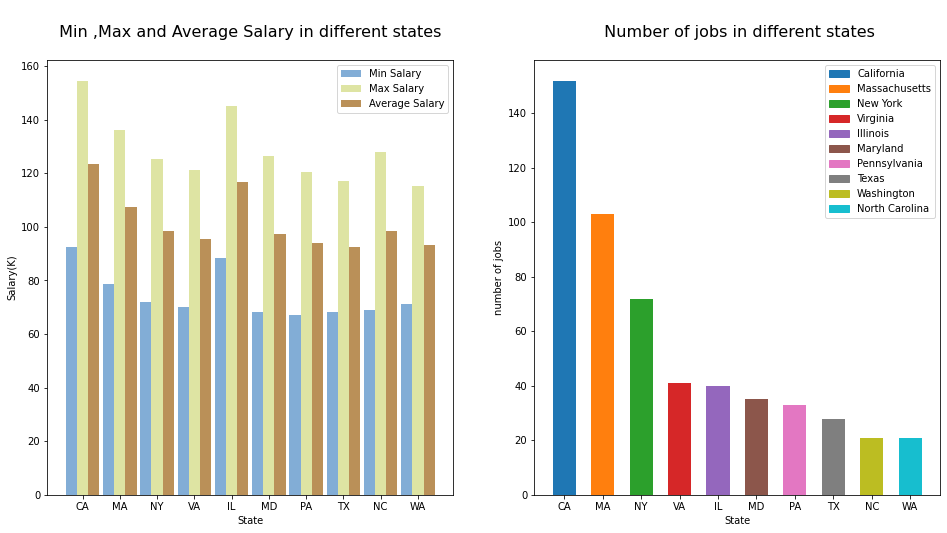

In [13]:
city_lab=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]
lab=[]
for i in sorter[0:10]:
    lab.append(i)
x = np.arange(len(lab))
width = 0.30
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].bar(x - width/2,salary["Lower Salary"][0:10],width,label='Min Salary',color = "#82ADD6")
ax[0].bar(x + width/2,salary["Upper Salary"][0:10],width,label='Max Salary',color = "#DEE4A3")
ax[0].bar(x + 1.5*width,salary["Avg Salary(K)"][0:10],width,label='Average Salary',color = "#BA9058")
ax[0].set_xlabel("State")
ax[0].set_ylabel("Salary(K)")
ax[0].set_xticks(x+width/2)
ax[0].set_xticklabels(lab)
ax[0].legend()
ax[0].set_title("\n Min ,Max and Average Salary in different states \n",size = 16)
ax[1].bar(df["Location city"].value_counts().index[0:10],df["Location city"].value_counts()[0:10],width = 0.6,color=sns.color_palette())
ax[1].set_xlabel("State")
ax[1].set_ylabel("number of jobs")
#ax[1].legend(handles=patches, loc="upper right")
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),city_lab)]
ax[1].set_title('\n Number of jobs in different states\n', size=16, color='black')
ax[1].legend(handles = patches,loc="upper right")
plt.show()

Find out the relationship between job title and salary

In [14]:
pd.pivot_table(df,index = ["job_title_sim"],values = "Avg Salary(K)",aggfunc=np.mean).sort_values(["Avg Salary(K)"],ascending = False).reset_index()

,job_title_sim,Avg Salary(K)
0,director,130.800000
1,machine learning engineer,126.431818
2,data scientist,118.293930
3,data engineer,105.403361
4,na,91.450000
5,other scientist,88.055944
6,data modeler,77.500000
7,Data scientist project manager,73.218750
8,data analitics,69.250000
9,analyst,66.113861


Find out the relation between Average Salary and Education

In [16]:
pd.pivot_table(df,index = ["Degree"],values = "Avg Salary(K)",aggfunc=np.mean).rename(columns = {"mean":"average salary"})

,Avg Salary(K)
Degree,
M,105.634921
P,115.981308
na,94.703655


In [17]:
pd.pivot_table(df,columns = ["Degree"],index = ["job_title_sim"],values = "Avg Salary(K)",aggfunc=np.mean).sort_values(["M"],ascending = False).reset_index().rename(columns = {"M":"Master","P":"Phd","na":"not required"})

Degree,job_title_sim,Master,Phd,not required
0,machine learning engineer,125.000000,134.200000,118.950000
1,data scientist,117.847826,129.578947,115.613139
2,data engineer,103.714286,132.250000,105.469512
3,other scientist,102.771429,100.509259,66.064815
4,na,92.000000,NaN,91.083333
5,Data scientist project manager,83.800000,NaN,68.409091
6,data analitics,82.500000,NaN,61.300000
7,data modeler,63.166667,NaN,99.000000
8,analyst,61.333333,NaN,67.858108
9,director,NaN,150.666667,101.000000


Find out the relationship between salary and industry

In [18]:
industry_salary = df.groupby("Industry")[["Lower Salary","Upper Salary","Avg Salary(K)"]].mean().reset_index()
sorter = df.Industry.value_counts().index

In [19]:
industry_salary["Industry"] = industry_salary["Industry"].astype("category")
industry_salary["Industry"].cat.set_categories(sorter, inplace=True)

#Resetting and droping the index

industry_salary = industry_salary.sort_values(["Industry"]).reset_index()
industry_salary = industry_salary.drop("index",axis = 1)
industry_salary

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,Industry,Lower Salary,Upper Salary,Avg Salary(K)
0,Biotech & Pharmaceuticals,79.883929,144.357143,112.120536
1,Insurance Carriers,77.793651,133.460317,105.626984
2,Computer Hardware & Software,84.881356,145.508475,115.194915
3,IT Services,78.280000,127.400000,102.840000
4,Health Care Services & Hospitals,56.346939,97.775510,77.061224
5,Enterprise Software & Network Solutions,87.333333,143.404762,115.369048
6,Internet,96.241379,151.379310,123.810345
7,Consulting,80.206897,137.172414,108.689655
8,Aerospace & Defense,72.920000,125.200000,99.060000
9,Advertising & Marketing,76.640000,131.960000,104.300000


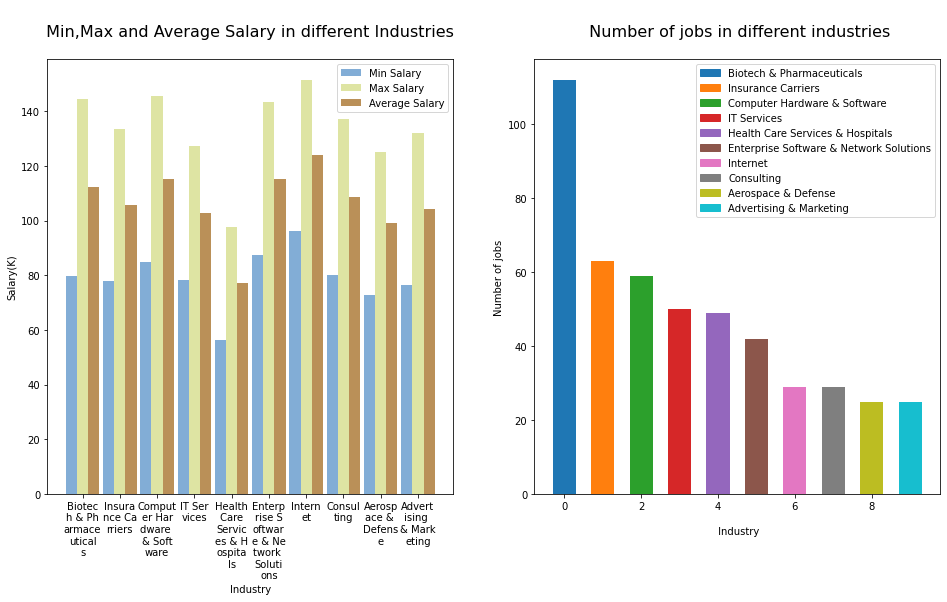

In [20]:
lab=[]
for i in sorter[0:10]:
    lab.append(i)
x = np.arange(len(lab))
width = 0.30
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].bar(x - width/2,industry_salary["Lower Salary"][0:10],width,label='Min Salary',color = "#82ADD6")
ax[0].bar(x + width/2,industry_salary["Upper Salary"][0:10],width,label='Max Salary',color = "#DEE4A3")
ax[0].bar(x + 1.5*width,industry_salary["Avg Salary(K)"][0:10],width,label='Average Salary',color = "#BA9058")
ax[0].set_xlabel("Industry")
ax[0].set_ylabel("Salary(K)")
ax[0].set_xticks(x+width/2)
xlabels_new = [re.sub("(.{6})", "\\1\n", label, 0, re.DOTALL) for label in lab]
ax[0].set_xticklabels(xlabels_new)
ax[0].legend()
ax[0].set_title("\n Min,Max and Average Salary in different Industries \n",size = 16)
ax[1].bar(x,df["Industry"].value_counts()[0:10],width = 0.6,color=sns.color_palette())
ax[1].set_xlabel("\n Industry")
ax[1].set_ylabel("Number of jobs")
#ax[1].legend(handles=patches, loc="upper right")
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),industry_salary["Industry"])]
ax[1].set_title('\n Number of jobs in different industries\n', size=16, color='black')
ax[1].legend(handles = patches,loc="upper right")
plt.show()

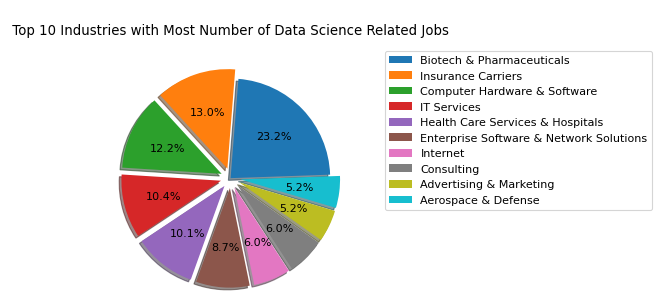

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=80)
my_explode=(0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:10].index]
plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:10],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=2)
plt.legend(labels,loc="best",bbox_to_anchor=(0.9, 1.05),prop={'size': 10})
plt.title('\n Top 10 Industries with Most Number of Data Science Related Jobs \n', size=12, color='black')
plt.axis('equal')
plt.show()

Connection between company size and salary

In [22]:
size_salary = df.groupby("Size")[["Lower Salary","Upper Salary","Avg Salary(K)"]].mean().sort_values("Avg Salary(K)",ascending=False)
size_salary = size_salary.drop("unknown",axis = 0)
size_salary

,Lower Salary,Upper Salary,Avg Salary(K)
Size,,,
10000+,83.661538,141.946154,112.803846
51 - 200,84.468085,139.074468,111.771277
1 - 50,78.580645,131.548387,105.064516
201 - 500,72.136752,128.358974,100.247863
5001 - 10000,70.421053,124.552632,97.486842
1001 - 5000,68.953333,120.426667,94.690000
501 - 1000,66.865672,116.141791,91.503731


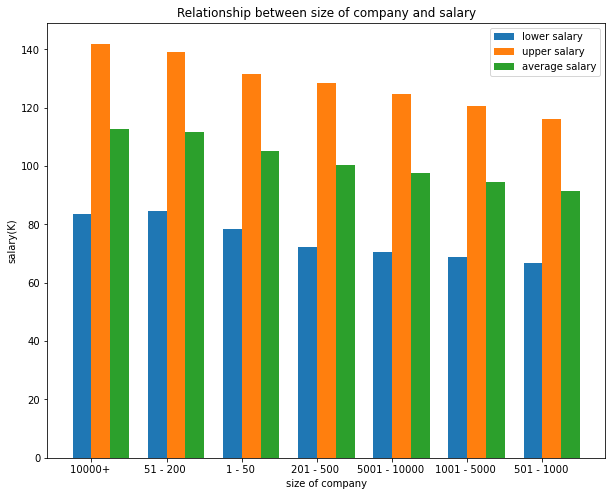

In [23]:
plt.figure(figsize=(10,8))
lab=[]
for i in (size_salary.index):
    lab.append(i)
x = np.arange(len(lab))
width = 0.25
plt.bar(x-width/2,size_salary["Lower Salary"],width,label = "lower salary")
plt.bar(x+width/2,size_salary["Upper Salary"],width, label = "upper salary")
plt.bar(x+1.5*width,size_salary["Avg Salary(K)"],width, label = "average salary")
plt.xticks(x, lab)
plt.xlabel("size of company")
plt.ylabel("salary(K)")
plt.title("Relationship between size of company and salary")
plt.legend()

Relationship between Revenue and salary 

In [24]:
Revenue_salary = df.groupby(["Revenue"])[[ "Avg Salary(K)","Lower Salary","Upper Salary"]].mean().sort_values("Avg Salary(K)",ascending=False)
Revenue_salary

,Avg Salary(K),Lower Salary,Upper Salary
Revenue,,,
$5 to $10 million (USD),126.111111,94.500000,157.722222
$1 to $5 million (USD),119.312500,88.125000,150.500000
$10+ billion (USD),115.592742,85.120968,146.064516
Less than $1 million (USD),108.625000,80.750000,136.500000
Unknown / Non-Applicable,105.110294,78.254902,131.965686
$1 to $2 billion (USD),104.533333,76.850000,132.216667
$50 to $100 million (USD),102.565217,77.652174,127.478261
$10 to $25 million (USD),101.593750,74.187500,129.000000
$2 to $5 billion (USD),95.448718,70.948718,119.948718


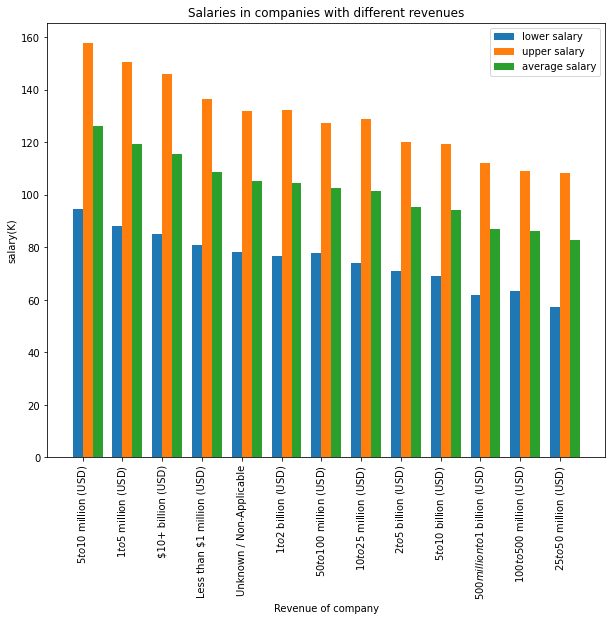

In [26]:
plt.figure(figsize=(10,8))
lab=[]
for i in (Revenue_salary.index):
    lab.append(i)
x = np.arange(len(lab))
width = 0.25
plt.bar(x-width/2,Revenue_salary["Lower Salary"],width,label = "lower salary")
plt.bar(x+width/2,Revenue_salary["Upper Salary"],width, label = "upper salary")
plt.bar(x+1.5*width,Revenue_salary["Avg Salary(K)"],width, label = "average salary")
plt.xticks(x, lab,rotation='vertical')
plt.xlabel("Revenue of company")
plt.ylabel("salary(K)")
plt.title("Salaries in companies with different revenues")
plt.legend()

Fit a multiple regression model

In [28]:
col_numer = ['Rating','Hourly','Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']
col_categ = ['Size','Employer provided','job_title_sim','Location city','Degree','Industry','Revenue']
col_salary = ['Avg Salary(K)','Lower Salary','Upper Salary']
X = df[col_numer+col_categ]
X_numer, X_categ, y = df[col_numer], df[col_categ], df[col_salary]
idx_cutoff = list(set(np.where(X==-1)[0].tolist()+np.where(X=='unknown')[0].tolist()+np.where(X=='Unknown / Non-Applicable')[0].tolist()))
X_numer, X_categ, y = X_numer.drop(index=idx_cutoff,axis=0), X_categ.drop(index=idx_cutoff,axis=0), y.drop(index=idx_cutoff)
X_categ = pd.get_dummies(data=X_categ)
X = pd.concat([X_numer,X_categ],axis=1)
X

,Rating,Hourly,Python,spark,aws,excel,sql,sas,keras,pytorch,...,Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD)
0,3.8,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.8,0,1,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3.4,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,3.6,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
737,3.9,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
738,4.4,0,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
740,3.2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
reg_avg = Ridge().fit(X.values, y.values[:,0])
y_avg_pred = reg_avg.predict(X.values)
r2_avg, mse_avg = reg_avg.score(X.values, y.values[:,0]), mean_squared_error(y_avg_pred,y.values[:,0],squared=False)
print('R2 Score = {}, MSE = {}.'.format(r2_avg, mse_avg))

R2 Score = 0.6286718307851659, MSE = 22.601067897864375.


In [33]:
coefs = pd.DataFrame(
    reg_avg.coef_,
    columns=["Coefficients"],
    index=X.keys(),
)

In [34]:
coefs

,Coefficients
Rating,4.970905
Hourly,-15.732156
Python,9.297627
spark,-5.011382
aws,3.921456
...,...
Revenue_$5 to $10 billion (USD),6.919710
Revenue_$5 to $10 million (USD),8.743670
Revenue_$50 to $100 million (USD),5.623509
Revenue_$500 million to $1 billion (USD),-3.120625


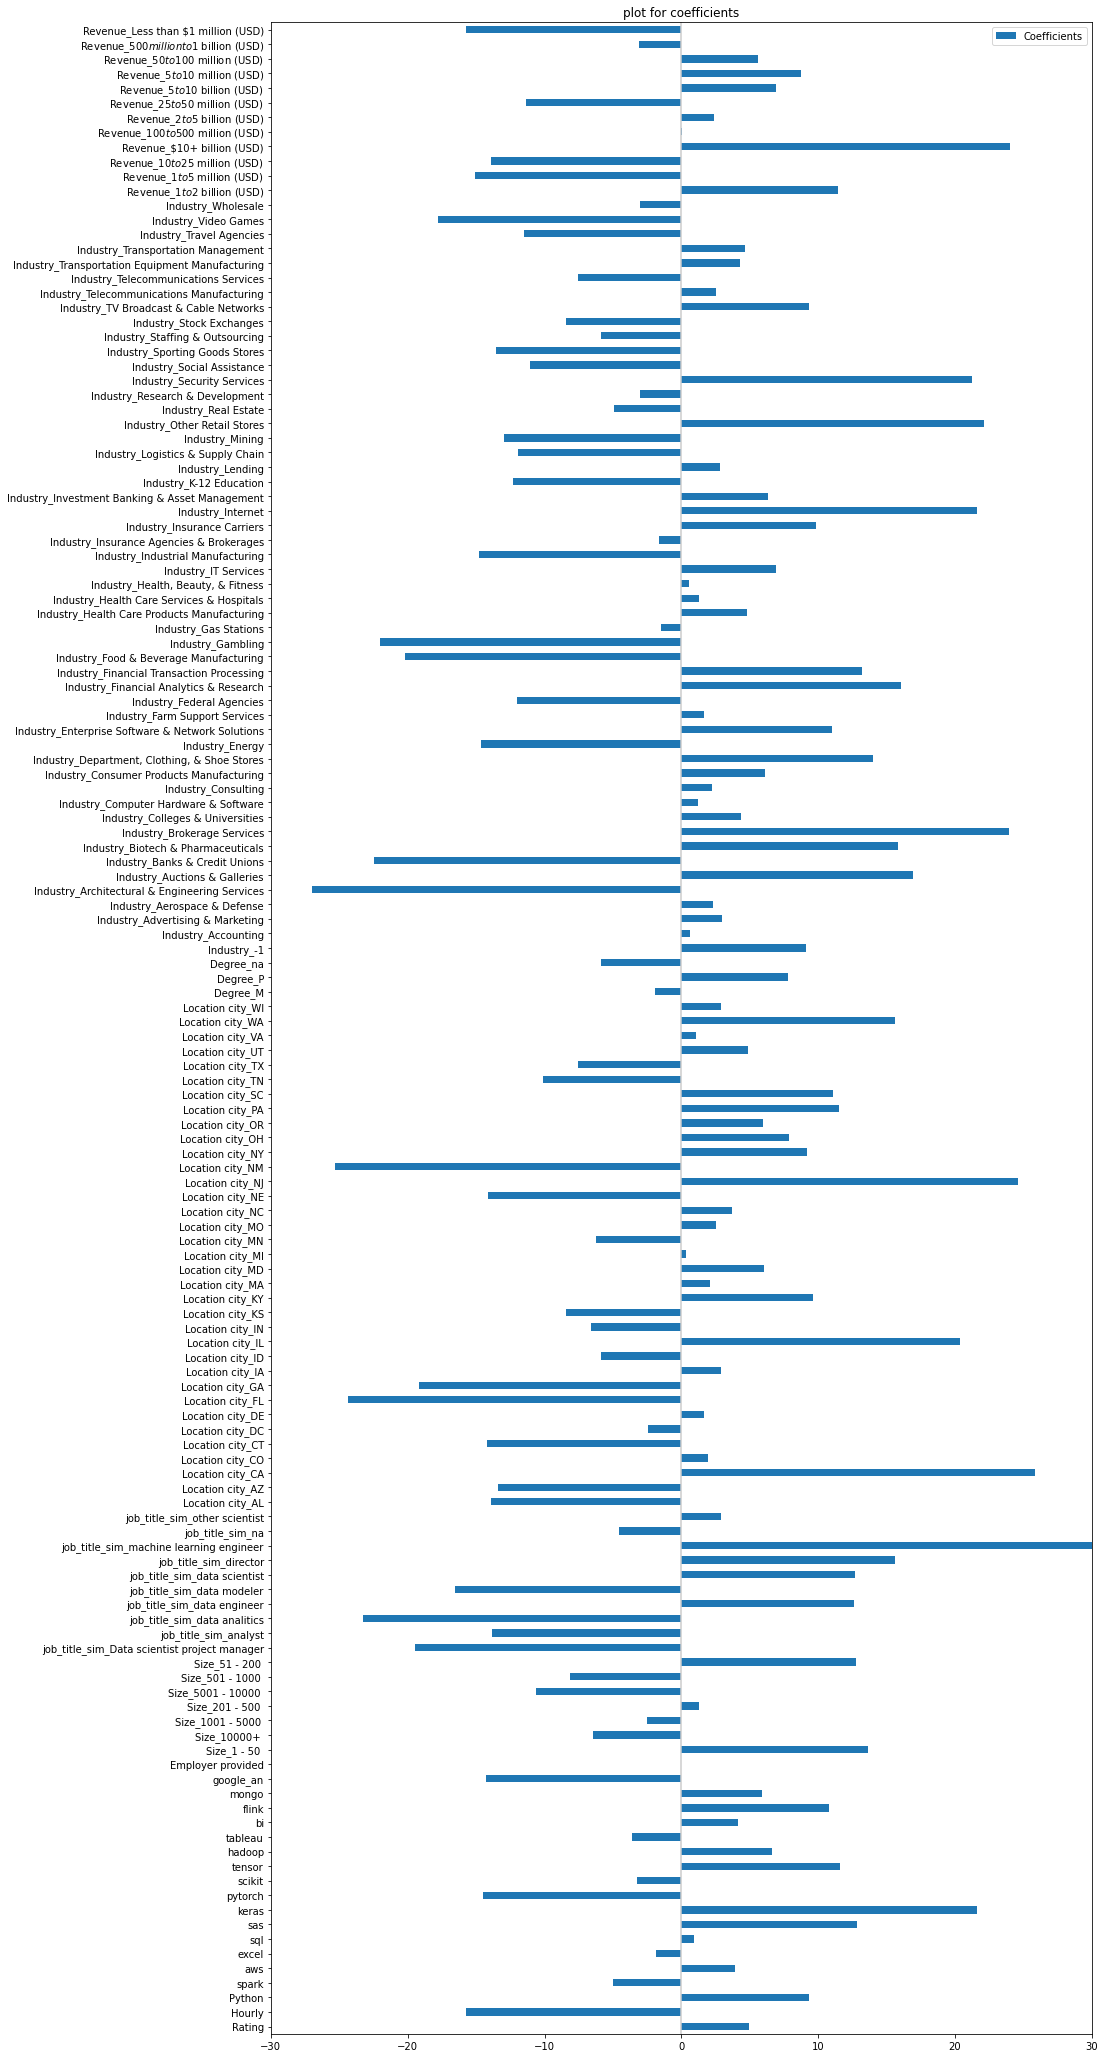

In [37]:
coefs.plot(kind="barh", figsize=(19, 37))
plt.title("plot for coefficients")
plt.xlim((-30,30))
plt.axvline(x=0, color=".8")
plt.subplots_adjust(left=0.3)